# Problem 06.01

## Problem:

Use LDA on the iris dataset (which is what Fisher originally tested LDA
on).

## Solution:

Load necessary libraries:

In [33]:
import numpy as np
import pylab as pl
import csv
import lda

Import data:

In [34]:
datafile = np.loadtxt(open('../../../datasets/iris/iris_proc.data'), delimiter = ",")

iris = datafile[:, 0:4]
labels = datafile[:, 4]

label0 = np.squeeze(labels == 0)
label1 = np.squeeze(labels == 1)
label2 = np.squeeze(labels == 2)

Train data:

In [35]:
iris_lda = lda.lda()
irisRed = iris_lda.trainWeights(iris, labels, 2)

Eigenvalue #0: 32.2719577997 accounts for 99.15% of data
Eigenvalue #1: 0.27756686384 accounts for 0.85% of data
Eigenvalue #2: 1.85714951407e-15 accounts for 0.0% of data
Eigenvalue #3: 1.87951536878e-15 accounts for 0.0% of data


Plot figure of original data:

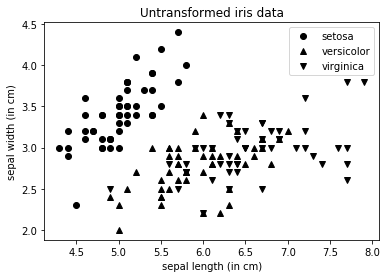

In [36]:
pl.figure(1)
pl.title("Untransformed iris data")
pl.plot(iris[label0, 0], iris[label0, 1], 'ok', label = 'setosa')
pl.plot(iris[label1, 0], iris[label1, 1], '^k', label = 'versicolor')
pl.plot(iris[label2, 0], iris[label2, 1], 'vk', label = 'virginica')
pl.xlabel('sepal length (in cm)')
pl.ylabel('sepal width (in cm)')
pl.legend(loc = "upper right")
pl.show()

Plot figure of transformed data:

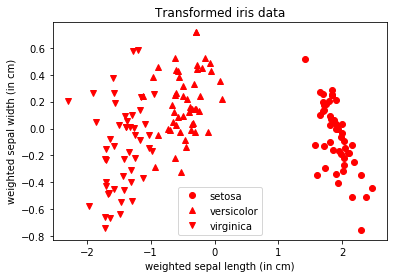

In [48]:
pl.figure(2)
pl.title("Transformed iris data")
pl.plot(irisRed[label0, 0], irisRed[label0, 1], 'or', label = 'setosa')
pl.plot(irisRed[label1, 0], irisRed[label1, 1], '^r', label = 'versicolor')
pl.plot(irisRed[label2, 0], irisRed[label2, 1], 'vr', label = 'virginica')
pl.xlabel('weighted sepal length (in cm)')
pl.ylabel('weighted sepal width (in cm)')
pl.legend(loc = "best")
pl.show()

where setosa are the circles, versicolor are the upward pointing triangles, and virginical are the downward pointing triangles.

It's evident that setosa is easy to separate, but let's look at each eigenvector independently:

In [38]:
irisAll = iris_lda.trainWeights(iris, labels, 4)

Eigenvalue #0: 32.2719577997 accounts for 99.15% of data
Eigenvalue #1: 0.27756686384 accounts for 0.85% of data
Eigenvalue #2: 1.85714951407e-15 accounts for 0.0% of data
Eigenvalue #3: 1.87951536878e-15 accounts for 0.0% of data


Now, we will plot the results in each dimension of the `IrisAll` dataset. Here is the weighted iris dataset using the first eigenvector:

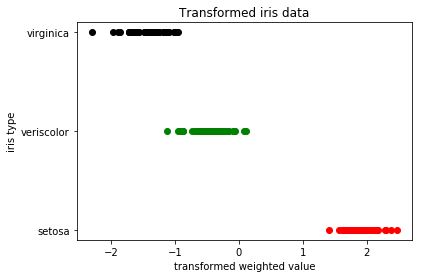

In [39]:
pl.figure(3)
pl.title("Transformed iris data")
pl.plot(irisAll[label0, 0], 1*np.ones((np.sum(label0), 1)), 'or', label = 'setosa')
pl.plot(irisAll[label1, 0], 2*np.ones((np.sum(label1), 1)), 'og', label = 'versicolor')
pl.plot(irisAll[label2, 0], 3*np.ones((np.sum(label2), 1)), 'ok', label = 'virginica')
pl.yticks(range(1, 4), ['setosa', 'veriscolor', 'virginica'])
pl.xlabel('transformed weighted value')
pl.ylabel('iris type')
pl.show()

Here is the weighted iris dataset using the second eigenvector:

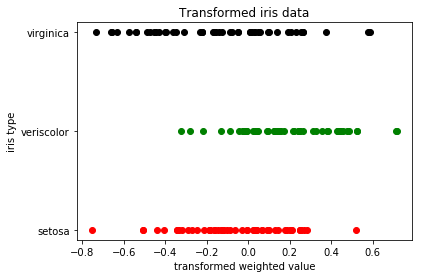

In [40]:
pl.figure(3)
pl.title("Transformed iris data")
pl.plot(irisAll[label0, 1], 1*np.ones((np.sum(label0), 1)), 'or', label = 'setosa')
pl.plot(irisAll[label1, 1], 2*np.ones((np.sum(label1), 1)), 'og', label = 'versicolor')
pl.plot(irisAll[label2, 1], 3*np.ones((np.sum(label2), 1)), 'ok', label = 'virginica')
pl.yticks(range(1, 4), ['setosa', 'veriscolor', 'virginica'])
pl.xlabel('transformed weighted value')
pl.ylabel('iris type')
pl.show()

Here is the weighted iris dataset using the third eigenvector:

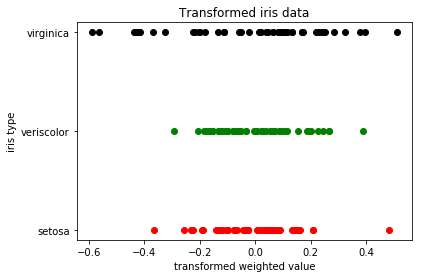

In [41]:
pl.figure(3)
pl.title("Transformed iris data")
pl.plot(irisAll[label0, 2], 1*np.ones((np.sum(label0), 1)), 'or', label = 'setosa')
pl.plot(irisAll[label1, 2], 2*np.ones((np.sum(label1), 1)), 'og', label = 'versicolor')
pl.plot(irisAll[label2, 2], 3*np.ones((np.sum(label2), 1)), 'ok', label = 'virginica')
pl.yticks(range(1, 4), ['setosa', 'veriscolor', 'virginica'])
pl.xlabel('transformed weighted value')
pl.ylabel('iris type')
pl.show()

Here is the weighted iris dataset using the fourth eigenvector:

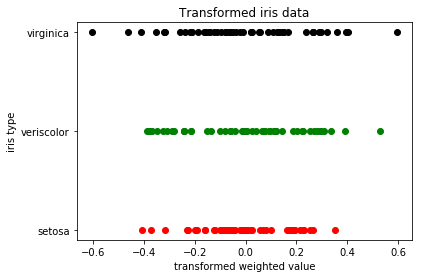

In [42]:
pl.figure(3)
pl.title("Transformed iris data")
pl.plot(irisAll[label0, 3], 1*np.ones((np.sum(label0), 1)), 'or', label = 'setosa')
pl.plot(irisAll[label1, 3], 2*np.ones((np.sum(label1), 1)), 'og', label = 'versicolor')
pl.plot(irisAll[label2, 3], 3*np.ones((np.sum(label2), 1)), 'ok', label = 'virginica')
pl.yticks(range(1, 4), ['setosa', 'veriscolor', 'virginica'])
pl.xlabel('transformed weighted value')
pl.ylabel('iris type')
pl.show()

The first eigenvector shows the most separation between the clases, which is unsurprising because it accounts for 99.15% of the variance. Each additional eigenvector exhibits less variance. The last two eigenvectors, with eigenvalues that are basically zero, can be discarded. The weights corresponding to the first eigenvector are:

In [43]:
print(iris_lda.weights[:, 0])

[ 0.20490976  0.38714331 -0.54648218 -0.71378517]


This indicates that the weighted first feature variable of the new iris dataset is proportional to both the sepal length and width, but inversely proportional to petal length and width.

However, even with the first eigenvector, it can still be hard to separate virginica and veriscolor.